In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib inline

In [3]:
points = np.load('/data/hok/testdata/fastsc/GM_k4.npz.npy')

# FastSC

In [4]:
cluster_file = open('/data/hok/testdata/fastsc/GM_k4_k4_sc_output.txt', 'r')
cluster_file_reader = csv.reader(cluster_file, delimiter=' ')
cluster_file_reader.__next__()
cluster_results = [(int(rowid), int(cluster)) for rowid, cluster in cluster_file_reader]
cluster_file.close()

In [5]:
cluster_results = sorted(cluster_results, key=lambda item: item[0])
clusters = np.array([row[1] for row in cluster_results])

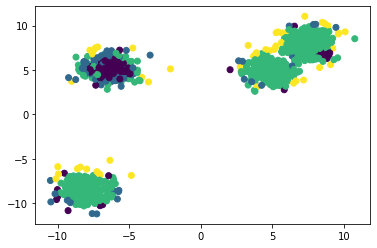

In [6]:
plt.scatter(points[:, 0], points[:, 1], c=clusters)

# scikit-learn kmeans

In [7]:
from sklearn.cluster import k_means

centroids, labels, intertia = k_means(points, n_clusters=4)

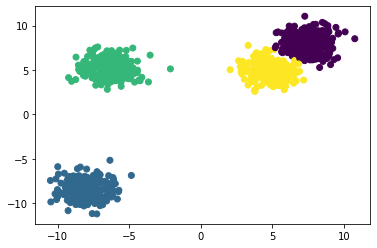

In [8]:
plt.scatter(points[:, 0], points[:, 1], c=labels)

# scikit-learn SpectralClustering

In [9]:
from sklearn.cluster import SpectralClustering

sklearn_sc = SpectralClustering(n_clusters=4, assign_labels='kmeans', random_state=0).fit(points)

# sklearn_sc.labels_

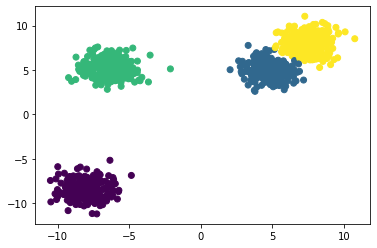

In [10]:
plt.scatter(points[:, 0], points[:, 1], c=sklearn_sc.labels_)

# SeqSC

In [11]:
from pyseqsc.seqkm import seq_sc

In [12]:
from scipy.spatial.distance import euclidean

In [13]:
centroids, labels = seq_sc(points, 4, 4, euclidean, int(points.shape[0]/10))

/data/hok/conda/envs/hokdev/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


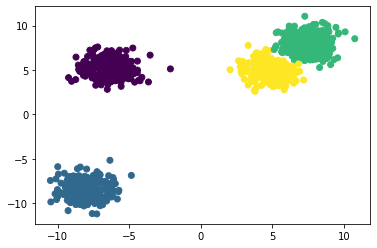

In [14]:
plt.scatter(points[:, 0], points[:, 1], c=labels)

# Debugging Session

In [21]:
from pyseqsc.seqkm import seq_kmeans, compute_spectral_vectors_anchor, seq_svd
from scipy.spatial.distance import sqeuclidean

In [15]:
anchor_points, _ = seq_kmeans(points, 3, int(points.shape[0]/10))

In [16]:
centroids

array([[-6.38305166,  5.17025885],
       [ 7.56742635,  8.04340698],
       [-8.02328441, -8.34469485],
       [ 4.84326355,  4.93486104]])

In [17]:
Z = compute_spectral_vectors_anchor(points, anchor_points, sqeuclidean)

In [18]:
Z

array([[1.94237705e-02, 4.20223679e-02, 9.92649682e-05],
       [1.51386057e-04, 2.81847840e-02, 2.33205912e-02],
       [6.01591728e-06, 2.67101807e-02, 2.45381590e-02],
       ...,
       [1.90523688e-02, 5.48274210e-04, 3.18956348e-02],
       [2.01903813e-02, 4.14357225e-02, 4.06110300e-05],
       [1.71266588e-02, 1.25320223e-03, 3.26277765e-02]])

In [23]:
A, sigma, B = seq_svd(Z, 3)

/data/hok/conda/envs/hokdev/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


In [26]:
seq_kmeans(np.real(A), 4, int(points.shape[0]/10))

(array([[ 0.03162278,  0.00421497,  0.02896377],
        [ 0.03162278,  0.02840438, -0.04738802],
        [ 0.03162278, -0.05346917, -0.01164334],
        [ 0.03162278,  0.01471268,  0.02807567]]),
 array([1., 2., 2., 1., 0., 3., 3., 1., 0., 1., 1., 1., 2., 1., 3., 1., 1.,
        1., 1., 3., 3., 1., 1., 3., 1., 0., 3., 1., 3., 3., 3., 0., 2., 0.,
        3., 0., 2., 3., 3., 2., 2., 1., 1., 3., 1., 3., 3., 2., 3., 2., 1.,
        3., 3., 0., 3., 2., 3., 2., 2., 1., 0., 3., 2., 3., 1., 3., 1., 2.,
        1., 1., 1., 2., 0., 3., 2., 0., 1., 3., 3., 3., 3., 3., 1., 1., 3.,
        3., 1., 3., 1., 3., 3., 3., 3., 2., 2., 3., 1., 0., 3., 1., 1., 3.,
        3., 1., 3., 3., 3., 3., 3., 3., 1., 3., 3., 2., 1., 3., 3., 3., 2.,
        2., 1., 1., 2., 3., 3., 2., 2., 3., 2., 0., 1., 3., 2., 1., 1., 2.,
        1., 0., 3., 2., 3., 3., 2., 2., 1., 1., 3., 2., 1., 3., 1., 0., 2.,
        3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 1., 1., 1., 1., 3.,
        3., 2., 0., 2., 1., 3., 2., 3., 1.

In [30]:
assert np.imag(np.sum(A))==1

AssertionError: 